In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('exams.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [7]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
data['race/ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [9]:
data['parental level of education'].unique()

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

In [10]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
data['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [12]:
data['Total Score'] = data['math score'] + data['reading score'] + data['writing score']

In [13]:
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210


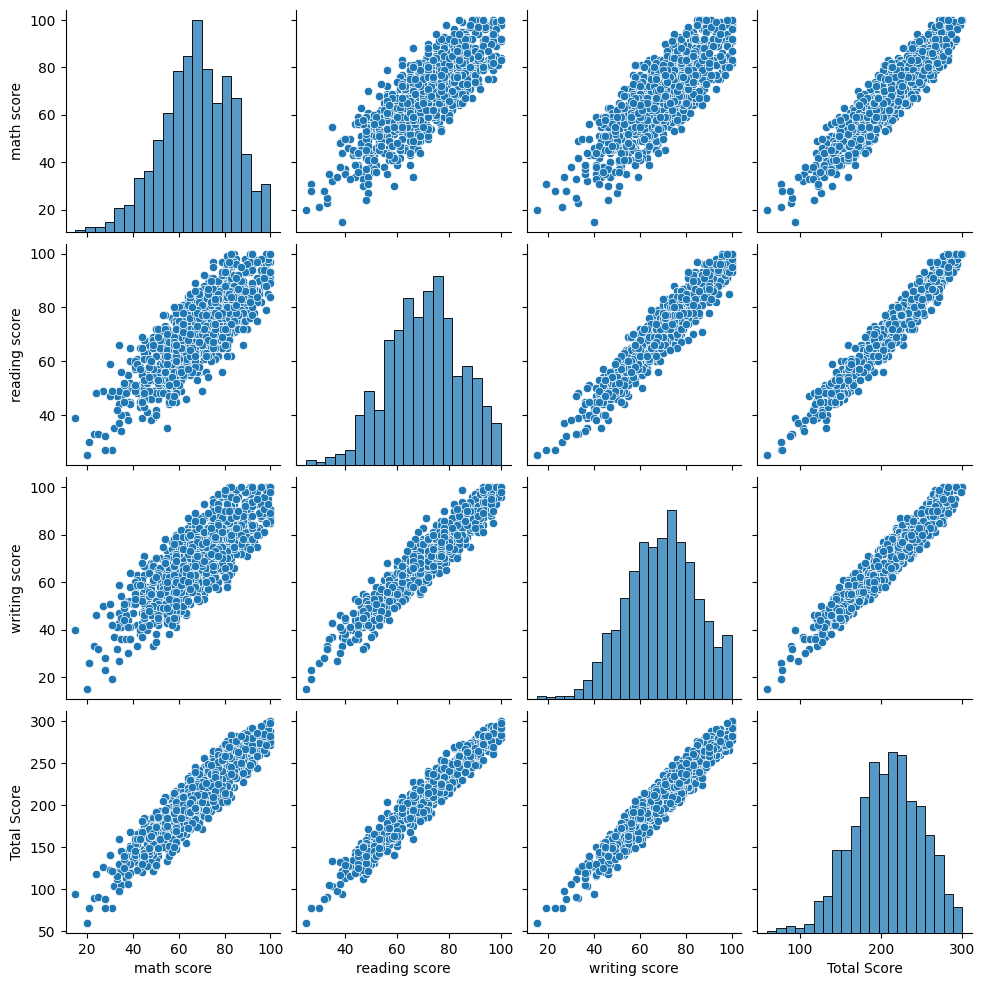

In [14]:
sns.pairplot(data)

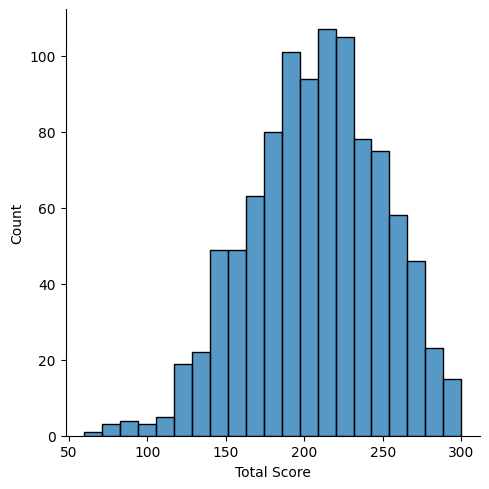

In [15]:
sns.displot(data['Total Score'])

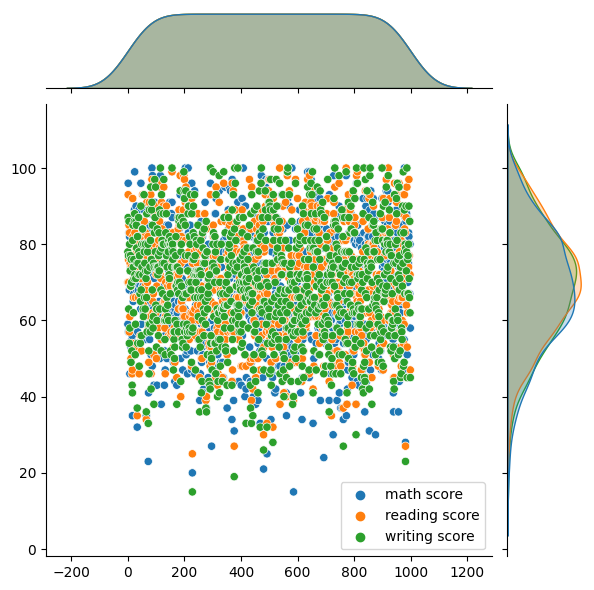

In [16]:
score_data = data.drop(columns = 'Total Score')
sns.jointplot(score_data)

<AxesSubplot: >

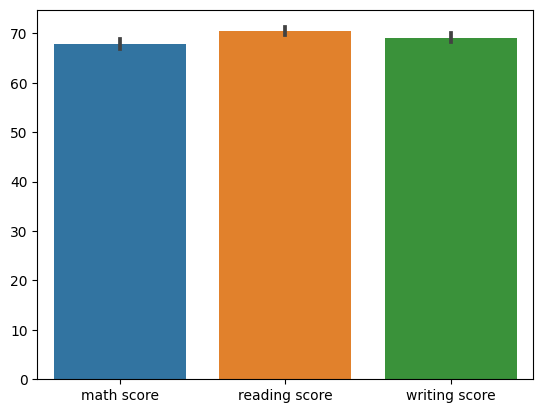

In [17]:
sns.barplot(score_data)

<AxesSubplot: xlabel='gender', ylabel='Total Score'>

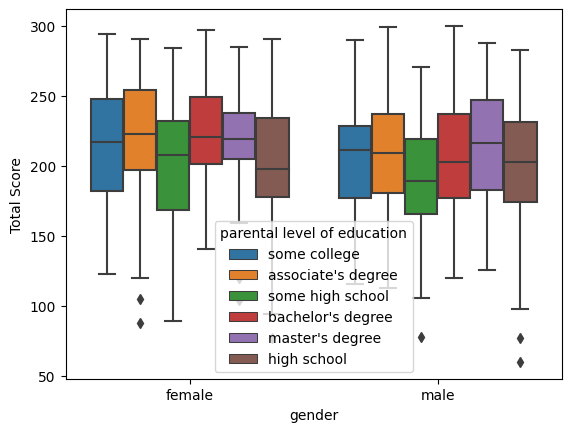

In [18]:
sns.boxplot(x='gender', y= 'Total Score', data= data, hue= 'parental level of education')

<AxesSubplot: xlabel='gender', ylabel='Total Score'>

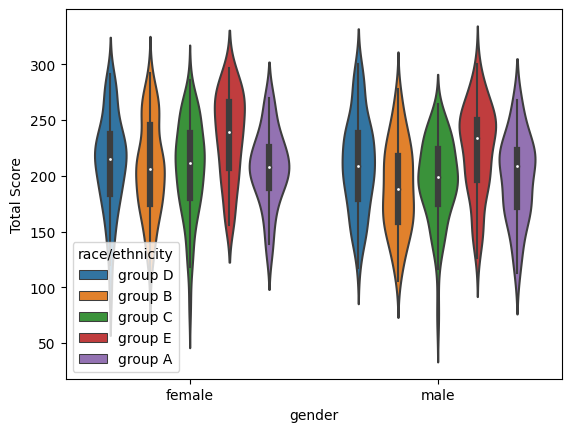

In [19]:
sns.violinplot(x='gender', y= 'Total Score', data= data, hue= 'race/ethnicity')

In [20]:
corr_data = score_data.corr()
corr_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_16096\274014761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = score_data.corr()


,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


<AxesSubplot: >

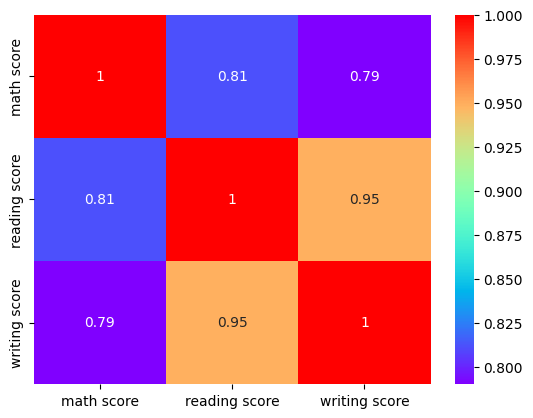

In [21]:
sns.heatmap(corr_data, cmap='rainbow',annot=True)

<AxesSubplot: xlabel='gender', ylabel='Total Score'>

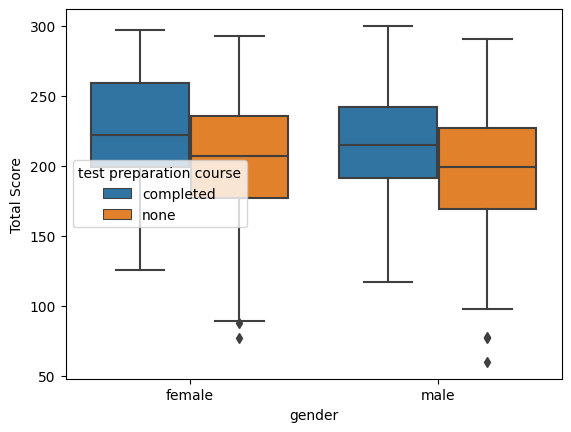

In [22]:
sns.boxplot(x='gender', y= 'Total Score', data= data, hue= 'test preparation course')

<AxesSubplot: xlabel='lunch', ylabel='Total Score'>

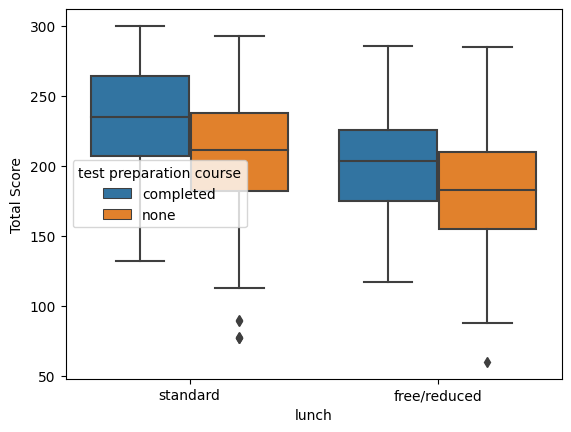

In [23]:
sns.boxplot(x='lunch', y= 'Total Score', data= data, hue= 'test preparation course')

<AxesSubplot: >

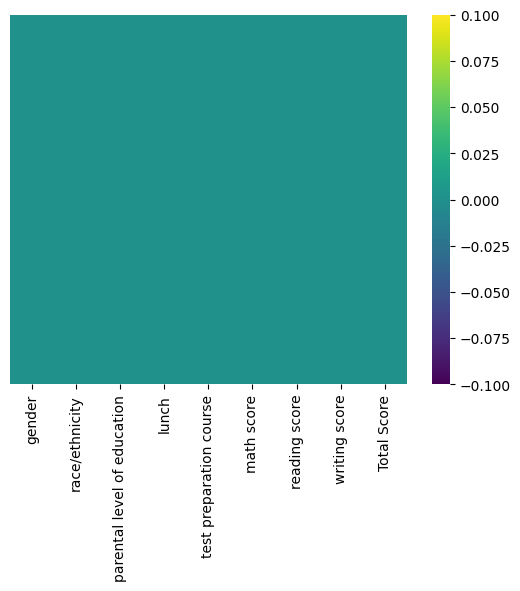

In [24]:
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False)

In [25]:
pd.get_dummies(data['gender'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
995,0,1
996,0,1
997,1,0
998,0,1


In [26]:
gender = pd.get_dummies(data['gender'],drop_first = True)
gender

,male
0,0
1,1
2,0
3,1
4,0
...,...
995,1
996,1
997,0
998,1


In [27]:
lunch = pd.get_dummies(data['lunch'],drop_first = True)
lunch

,standard
0,1
1,1
2,0
3,0
4,1
...,...
995,1
996,1
997,1
998,1


In [28]:
test_preparation = pd.get_dummies(data['test preparation course'],drop_first= True)
test_preparation

,none
0,0
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,0
998,1


In [29]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254


In [30]:
data = pd.concat([data,gender,lunch,test_preparation],axis=1)

In [31]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,male,standard,none
0,female,group D,some college,standard,completed,59,70,78,207,0,1,0
1,male,group D,associate's degree,standard,none,96,93,87,276,1,1,1
2,female,group D,some college,free/reduced,none,57,76,77,210,0,0,1
3,male,group B,some college,free/reduced,none,70,70,63,203,1,0,1
4,female,group D,associate's degree,standard,none,83,85,86,254,0,1,1


In [32]:
data.drop(['gender','lunch','test preparation course'],axis=1,inplace=True)

In [33]:
data.head()

,race/ethnicity,parental level of education,math score,reading score,writing score,Total Score,male,standard,none
0,group D,some college,59,70,78,207,0,1,0
1,group D,associate's degree,96,93,87,276,1,1,1
2,group D,some college,57,76,77,210,0,0,1
3,group B,some college,70,70,63,203,1,0,1
4,group D,associate's degree,83,85,86,254,0,1,1


In [35]:
Parental_level_of_education = pd.get_dummies(data['parental level of education'])
Parental_level_of_education

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
995,0,0,0,0,1,0
996,0,0,0,0,1,0
997,0,0,1,0,0,0
998,0,0,1,0,0,0


In [36]:
ethnicity = pd.get_dummies(data['race/ethnicity'])
ethnicity           

,group A,group B,group C,group D,group E
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
995,0,0,1,0,0
996,0,0,1,0,0
997,1,0,0,0,0
998,0,0,0,0,1


In [37]:
data = pd.concat([data,Parental_level_of_education,ethnicity],axis=1)
data.head()

,race/ethnicity,parental level of education,math score,reading score,writing score,Total Score,male,standard,none,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E
0,group D,some college,59,70,78,207,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,group D,associate's degree,96,93,87,276,1,1,1,1,0,0,0,0,0,0,0,0,1,0
2,group D,some college,57,76,77,210,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,group B,some college,70,70,63,203,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,group D,associate's degree,83,85,86,254,0,1,1,1,0,0,0,0,0,0,0,0,1,0


In [39]:
data.drop(['race/ethnicity','parental level of education'],axis=1, inplace=True)

In [40]:
data.head()

,math score,reading score,writing score,Total Score,male,standard,none,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E
0,59,70,78,207,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,96,93,87,276,1,1,1,1,0,0,0,0,0,0,0,0,1,0
2,57,76,77,210,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,70,70,63,203,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,83,85,86,254,0,1,1,1,0,0,0,0,0,0,0,0,1,0


In [43]:
data.columns

Index(['math score', 'reading score', 'writing score', 'Total Score', 'male',
       'standard', 'none', 'associate's degree', 'bachelor's degree',
       'high school', 'master's degree', 'some college', 'some high school',
       'group A', 'group B', 'group C', 'group D', 'group E'],
      dtype='object')

In [70]:
data.drop(['Total Score'],axis=1,inplace=True)

In [71]:
data.head()

,math score,reading score,writing score,male,standard,none,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E
0,59,70,78,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,96,93,87,1,1,1,1,0,0,0,0,0,0,0,0,1,0
2,57,76,77,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,70,70,63,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,83,85,86,0,1,1,1,0,0,0,0,0,0,0,0,1,0


In [74]:
data['evalute'] = 0
data.head()

,math score,reading score,writing score,male,standard,none,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E,evalute
0,59,70,78,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,96,93,87,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0
2,57,76,77,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,70,70,63,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,83,85,86,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0


In [85]:
data['evalute'] = np.where((data['math score']>60) & (data['writing score']>60 ) &(data['reading score']>60),1, 0)

In [86]:
data.head()

,math score,reading score,writing score,male,standard,none,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E,evalute
0,59,70,78,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,96,93,87,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1
2,57,76,77,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,70,70,63,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,83,85,86,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1


In [87]:
data.columns

Index(['math score', 'reading score', 'writing score', 'male', 'standard',
       'none', 'associate's degree', 'bachelor's degree', 'high school',
       'master's degree', 'some college', 'some high school', 'group A',
       'group B', 'group C', 'group D', 'group E', 'evalute'],
      dtype='object')

# Logistic Regression

In [88]:
X = data.drop(['evalute'],axis=1)

In [89]:
X.head()

,math score,reading score,writing score,male,standard,none,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E
0,59,70,78,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,96,93,87,1,1,1,1,0,0,0,0,0,0,0,0,1,0
2,57,76,77,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,70,70,63,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,83,85,86,0,1,1,1,0,0,0,0,0,0,0,0,1,0


In [90]:
y=data['evalute']
y

0      0
1      1
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    0
Name: evalute, Length: 1000, dtype: int32

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
logmodel = LogisticRegression()

In [95]:
logmodel.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
prediction = logmodel.predict(X_test)

In [97]:
prediction

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [98]:
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       121
           1       0.91      0.94      0.93       179

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300



In [100]:
confusion_matrix(y_test,prediction)

array([[105,  16],
       [ 11, 168]], dtype=int64)